<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/SQC%20Lab%206%20(A9)%20SPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cooper Page

Jack Schaal

Brandon Thimmesch

IMSE 541 - Lab 6 (A9)

18 November 2022

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# retrive data for Example 6.1
data = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SPC_Lab_Data.csv', sep=',', na_values=".")
data.tail()

,Sample,day_1,day_2,day_3,day_4,day_5
27,28,5.269786,5.128312,4.871484,5.097659,5.126345
28,29,4.951144,5.017581,5.186979,5.079784,5.117354
29,30,5.003906,4.826819,4.987657,5.067972,4.911742
30,31,5.045140,5.036555,5.124574,4.820506,4.790954
31,32,5.189366,4.773107,4.874482,5.105099,5.038591


In [4]:
#generate the Phase I data using filter
#use the first 30 observations to setup the control charts
dataI= [data[['day_1', 'day_2', 'day_3', 'day_4','day_5']][data['Sample'] < 31]]

#retrieve the Phase II data
dataII= [data[['day_1', 'day_2', 'day_3', 'day_4','day_5']][data['Sample'] >= 31]]
         
#all data points; the data type is a list
dataAll = [data[['day_1', 'day_2', 'day_3', 'day_4','day_5']]]

dataAll

[       day_1     day_2     day_3     day_4     day_5
 0   4.956226  5.098501  4.990927  5.008180  4.866056
 1   4.940601  4.913714  4.751224  4.854182  5.181321
 2   5.041539  4.948017  5.022364  4.987711  5.079673
 3   4.961175  4.946725  4.889799  5.148932  5.160350
 4   4.937302  4.953122  5.040036  4.979728  5.090803
 5   5.144912  5.096352  4.958790  5.021773  4.815331
 6   4.829597  5.170259  4.919006  5.083386  4.946421
 7   4.987710  4.750614  5.077772  5.013243  4.907308
 8   4.867763  4.858964  5.215135  4.960335  4.992079
 9   5.161703  5.136948  5.073197  4.916410  5.166330
 10  5.060591  4.956777  5.010870  4.764206  4.945994
 11  4.907090  5.163159  4.872708  4.729306  4.989508
 12  5.025967  4.926888  5.032146  4.981712  5.198286
 13  5.005539  4.996989  4.963074  5.015233  5.125239
 14  4.747783  4.899176  5.180186  5.036707  5.072673
 15  5.098865  4.950509  5.031609  4.788819  5.062977
 16  4.578971  5.085578  5.012364  5.019940  4.925419
 17  4.993393  4.944552  4.9

In [5]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
x=np.reshape(dataI, (30,5))
x

array([[4.95622619, 5.0985012 , 4.99092705, 5.00818045, 4.86605565],
       [4.94060077, 4.91371407, 4.75122356, 4.85418236, 5.18132142],
       [5.04153882, 4.94801705, 5.02236448, 4.98771051, 5.07967288],
       [4.9611751 , 4.94672481, 4.88979867, 5.14893194, 5.16034972],
       [4.93730247, 4.95312233, 5.04003636, 4.97972822, 5.0908028 ],
       [5.14491246, 5.09635165, 4.95879043, 5.02177285, 4.81533149],
       [4.82959672, 5.17025864, 4.91900614, 5.08338632, 4.94642071],
       [4.98770972, 4.75061361, 5.07777181, 5.01324315, 4.90730754],
       [4.86776316, 4.85896362, 5.21513481, 4.96033499, 4.9920794 ],
       [5.16170297, 5.13694762, 5.07319723, 4.91641003, 5.1663298 ],
       [5.06059131, 4.95677711, 5.01087043, 4.76420617, 4.94599405],
       [4.90708962, 5.16315881, 4.87270773, 4.72930566, 4.9895075 ],
       [5.02596707, 4.92688772, 5.03214559, 4.98171199, 5.19828626],
       [5.00553873, 4.99698945, 4.96307396, 5.01523282, 5.12523942],
       [4.7477831 , 4.89917613, 5.

In [6]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = []

# Define list variable for groups standard deviation
s = []

In [7]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    s.append(np.std(group))
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

points in x,  30


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Sample')]

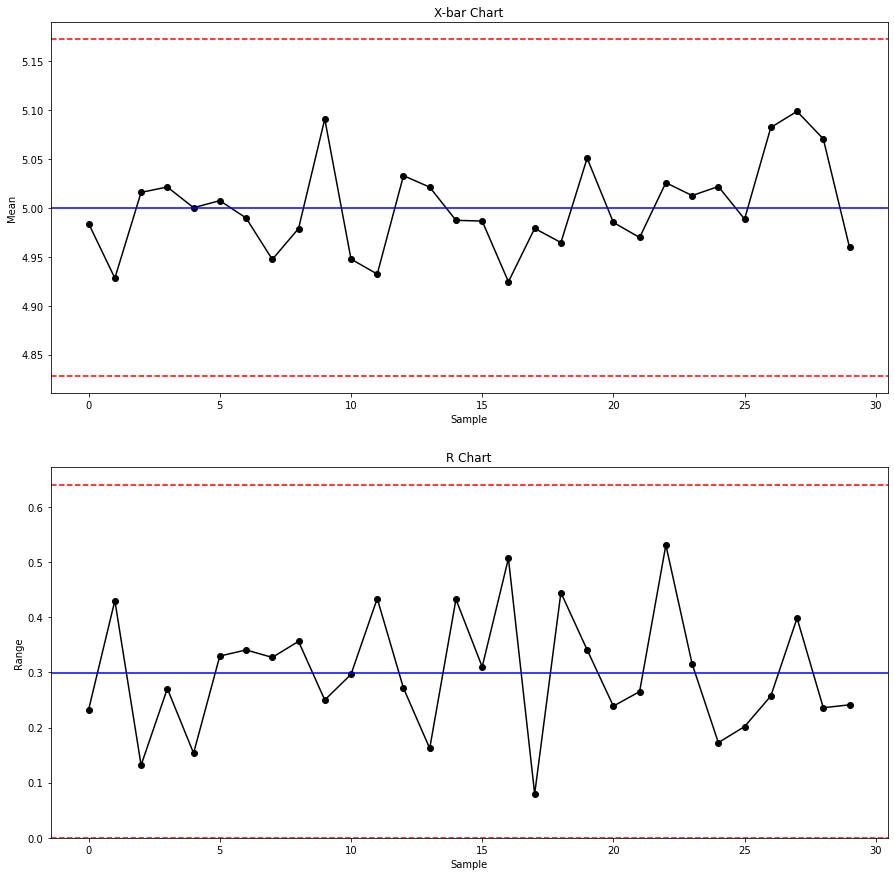

In [8]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 
A2=0.577 #n=5
D3=0     #n=5
D4=2.144 #n=5

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('X-bar Chart')
axs[0].set(xlabel='Sample', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Sample', ylabel='Range')

In [15]:
# R chart upper control limit
print(D4*statistics.mean(r))

0.6401043207082665


In [9]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [10]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Sample')]

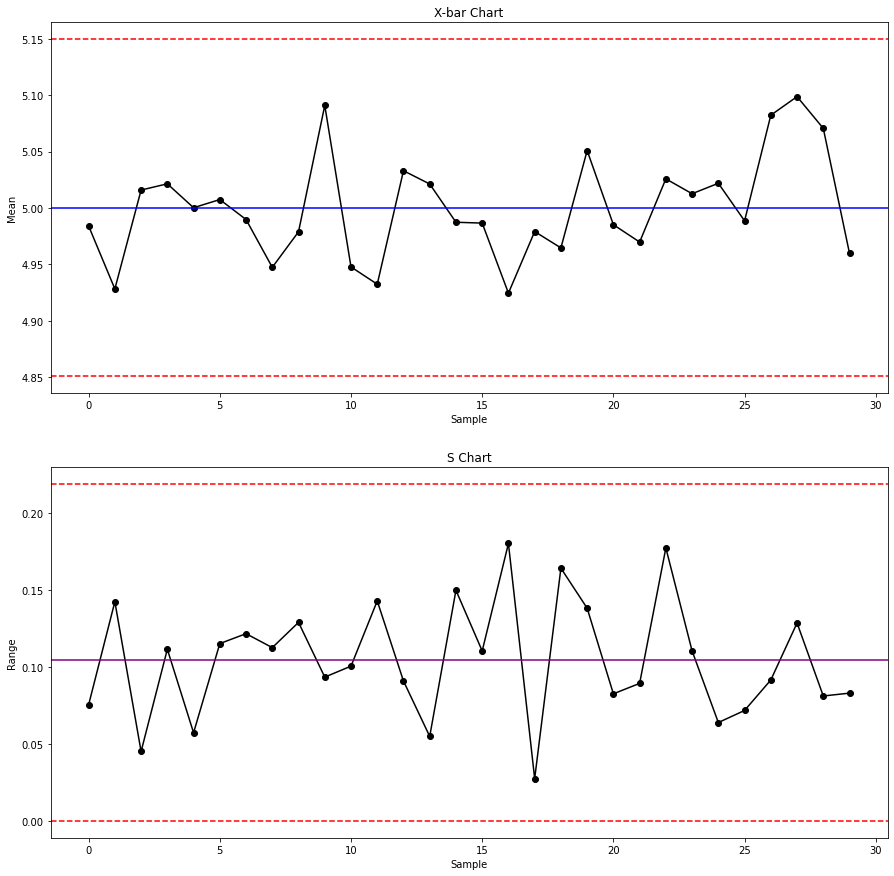

In [11]:
# Plot x-bar and S charts for all data points
# make sure the x-bar-bar and S are from phase I computation
# validate that using the X-bar and S charts previously generated
fig, axs = plt.subplots(2, figsize=(15,15))

# Chart parameters A3, B3, and B4 see the ref for other sample size
A3=1.427 #n=5
B3=0     #n=5
B4=2.089 #n=5

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A3*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A3*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('X-bar Chart')
axs[0].set(xlabel='Sample', ylabel='Mean')

# s chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((B4*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((B3*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(s)), color='purple')
axs[1].set_title('S Chart')
axs[1].set(xlabel='Sample', ylabel='Range')

In [17]:
# S chart upper control limit
print(B4*statistics.mean(s))

0.2187009827073377


In [12]:
# Validate points out of control limits for s chart
i = 0
control = True
for group in s:
    if group > B4*statistics.mean(s) or group < B3*statistics.mean(s):
        print('Group', i, 'out of standard deviation cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.
